Fetching the Data

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


Importing initial Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creating dataframe


In [ ]:
true_df = pd.read_csv('True.csv')
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fake_df = pd.read_csv('Fake.csv')
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


Merging the dataframes into a sigle dataframe

In [ ]:
true_df['label'] = '0'
fake_df['label'] = '1'

true_df['source'] = 'real'
fake_df['source'] = 'fake'

news_df = pd.concat([true_df, fake_df],axis=0)
news_df = news_df.sample(frac=1,random_state=42).reset_index(drop=True)
print(news_df.head())
print(f'Shape : {news_df.shape}')
print(f"Label counts : \n {news_df['label'].value_counts()}")

                                               title  \
0   BREAKING: GOP Chairman Grassley Has Had Enoug...   
1   Failed GOP Candidates Remembered In Hilarious...   
2   Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3  California AG pledges to defend birth control ...   
4  AZ RANCHERS Living On US-Mexico Border Destroy...   

                                                text       subject  \
0  Donald Trump s White House is in chaos, and th...          News   
1  Now that Donald Trump is the presumptive GOP n...          News   
2  Mike Pence is a huge homophobe. He supports ex...          News   
3  SAN FRANCISCO (Reuters) - California Attorney ...  politicsNews   
4  Twisted reasoning is all that comes from Pelos...      politics   

               date label source  
0     July 21, 2017     1   fake  
1       May 7, 2016     1   fake  
2  December 3, 2016     1   fake  
3  October 6, 2017      0   real  
4      Apr 25, 2017     1   fake  
Shape : (44898, 6)
Label counts 

Checking for null values and converting label to int

In [ ]:
news_df['label'] = news_df['label'].astype(int)

In [ ]:
news_df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0
source,0


Changing the date type

In [ ]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', errors='coerce')
news_df['date'] = news_df['date'].dt.strftime('%Y-%m-%d')
most_common_date = news_df['date'].mode().values[0]
news_df['date'] = news_df['date'].fillna(most_common_date)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     44898 non-null  datetime64[ns]
 4   label    44898 non-null  int64         
 5   source   44898 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.1+ MB


Clean and preprocess the text: lowercase, remove punctuation, stopwords.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
import nltk, re, string

stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(rf"[{re.escape(string.punctuation)}]", '', text)
    text = text.replace('\n', ' ')
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

news_df['text'] = news_df['text'].apply(preprocess_text)
news_df['title'] = news_df['title'].apply(preprocess_text)
news_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,title,text,subject,date,label,source
0,breaking gop chairman grassley enough demands ...,donald trump white house chaos trying cover ru...,News,2017-07-21,1,fake
1,failed gop candidates remembered hilarious moc...,donald trump presumptive gop nominee time reme...,News,2016-05-07,1,fake
2,mike pence ’ new dc neighbors hilariously trol...,mike pence huge homophobe supports exgay conve...,News,2016-12-03,1,fake
3,california ag pledges defend birth control ins...,san francisco reuters california attorney gene...,politicsNews,2017-10-06,0,real
4,az ranchers living usmexico border destroy nan...,twisted reasoning comes pelosi days especially...,politics,2017-04-25,1,fake
...,...,...,...,...,...,...
44893,nigeria says us agrees delayed 593 million fig...,abuja reuters united states formally agreed se...,worldnews,2017-12-27,0,real
44894,boiler room 62 – fatal illusions,tune alternate current radio network acr anoth...,Middle-east,2016-06-29,1,fake
44895,atheists sue governor texas display capitol gr...,convinced freedom religion group atheists get ...,Government News,2016-02-27,1,fake
44896,republican tax plan would deal financial hit u...,washington reuters republican tax plan unveile...,politicsNews,2017-11-02,0,real


Apply both Bag-of-Words and TF-IDF; compare the vectors.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow = CountVectorizer(max_features=10000)
tfidf =  TfidfVectorizer(max_features=10000)

x_bow = bow.fit_transform(news_df['text'])
x_tfidf = tfidf.fit_transform(news_df['text'])

print(f'BOW shape : {x_bow.shape}')
print(f'TFIDF shape : {x_tfidf.shape}')

# Top 10 BoW features by frequency
sum_words = x_bow.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in bow.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

print("\nTop 10 BoW Words:")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")

# Top 10 TF-IDF features by score
tfidf_scores  = x_tfidf.sum(axis=0)
tfidf_words  = [(word, tfidf_scores[0, idx]) for word, idx in tfidf.vocabulary_.items()]
tfidf_words = sorted(tfidf_words, key=lambda x: x[1], reverse=True)

print("\nTop 10 TF-IDF Words:")
for word, score in tfidf_words[:10]:
    print(f"{word}: {score}")

BOW shape : (44898, 10000)
TFIDF shape : (44898, 10000)

Top 10 BoW Words:
said: 130050
trump: 127538
us: 63109
would: 54934
president: 51908
people: 41167
one: 35564
state: 32226
also: 31172
new: 30893

Top 10 TF-IDF Words:
trump: 2481.656476183194
said: 1898.354571317147
us: 1157.9160499013476
president: 1028.4181091571904
would: 951.3829647487044
people: 823.7767947158045
clinton: 822.4556812189654
obama: 753.8516279087668
state: 733.5034536698805
house: 720.3598212551611


Train Logistic Regression on TF-IDF features; log accuracy and F1-score.



Accuracy : 98.62 %
F1-Score : 98.62 %
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4311
           1       0.99      0.98      0.99      4669

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



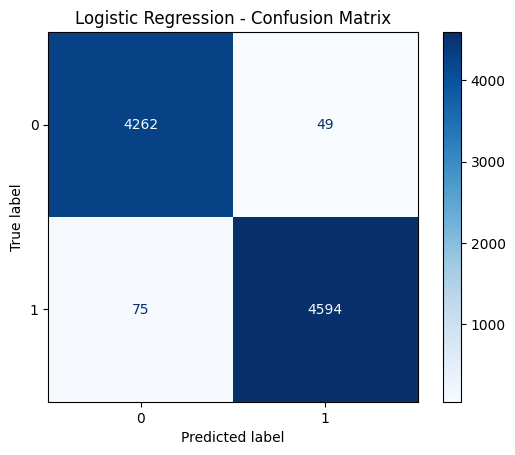

['tfidf.pkl']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

y = news_df['label']
X_train_text, X_test_text, y_train, y_test = train_test_split(news_df['text'], y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=10000)

X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

log_pred = lr_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, log_pred)
f1 = f1_score(y_test, log_pred, average='weighted')

print(f"Accuracy : {(accuracy*100):.2f} %")
print(f"F1-Score : {(f1*100):.2f} %")
print(classification_report(y_test, log_pred))

cm_log = confusion_matrix(y_test, log_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=lr_model.classes_)
disp_log.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(tfidf, 'tfidf.pkl')

Train SVM and compare it with Logistic Regression.

Accuracy : 99.42 %
F1-Score : 99.42 %

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4311
           1       1.00      0.99      0.99      4669

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



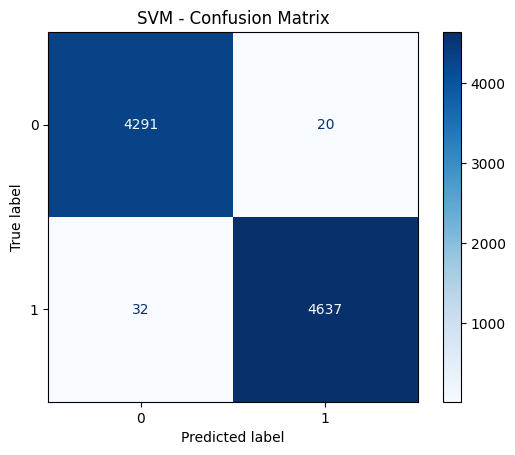

['svm_model.pkl']

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train_tfidf, y_train)

svm_pred = svm_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred, average='weighted')

print(f"Accuracy : {(accuracy*100):.2f} %")
print(f"F1-Score : {(f1*100):.2f} %")
print("\nClassification Report:\n", classification_report(y_test, svm_pred))

cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.show()

joblib.dump(svm_model, 'svm_model.pkl')

Use LSTM with word embeddings (Glove); track performance.

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


449/449 ━━━━━━━━━━━━━━━━━━━━ 327s 719ms/step - accuracy: 0.7258 - loss: 0.5137 - val_accuracy: 0.9727 - val_loss: 0.1150
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 316s 704ms/step - accuracy: 0.8753 - loss: 0.3074 - val_accuracy: 0.9459 - val_loss: 0.1987
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 319s 698ms/step - accuracy: 0.9163 - loss: 0.2269 - val_accuracy: 0.9624 - val_loss: 0.1326
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 321s 714ms/step - accuracy: 0.9482 - loss: 0.1846 - val_accuracy: 0.9303 - val_loss: 0.2631
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 318s 705ms/step - accuracy: 0.9614 - loss: 0.1343 - val_accuracy: 0.9822 - val_loss: 0.0602
281/281 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step
Accuracy : 98.35 %
F1-Score : 98.35 %

Classification Report:
               precision    recall  f1-score   support

        Fake       0.98      0.98      0.98      4311
        True       0.98      0.98      0.98      4669

    accuracy                           0.98      8980
   macro avg       0.98      0

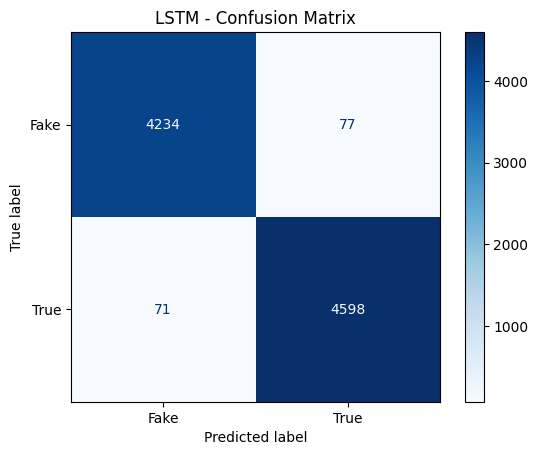

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

vocab_size = 10000
max_len = 300

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text)

x_train_seq = tokenizer.texts_to_sequences(X_train_text)
x_test_seq = tokenizer.texts_to_sequences(X_test_text)

x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post')

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    LSTM(128),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

y_pred_prob = model.predict(x_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {(accuracy*100):.2f} %")
print(f"F1-Score : {(f1*100):.2f} %")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Fake', 'True']))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot(cmap='Blues')
plt.title("LSTM - Confusion Matrix")
plt.show()


Perform 5-fold cross-validation and average F1-scores.

In [ ]:
from sklearn.model_selection import cross_val_score

svm_model = joblib.load('svm_model.pkl')
log_model = joblib.load('lr_model.pkl')

svc_cv_scores = cross_val_score(svm_model, x_tfidf, y, cv=5, scoring='f1_weighted')
print('Cross Validation and Average F1-Score Using SVM:')
print(f'Average F1-Score : {(np.mean(svc_cv_scores) * 100):.2f} %')

lr_cv_scores = cross_val_score(log_model, x_tfidf, y, cv=5, scoring='f1_weighted')
print('\nCross Validation and Average F1-Score Using Logistic Regression:')
print(f'Average F1-Score : {(np.mean(lr_cv_scores) * 100):.2f} %')

Cross Validation and Average F1-Score Using SVM:
Average F1-Score : 99.41 %

Cross Validation and Average F1-Score Using Logistic Regression:
Average F1-Score : 98.67 %


Visualize word clouds for fake and real news separately.


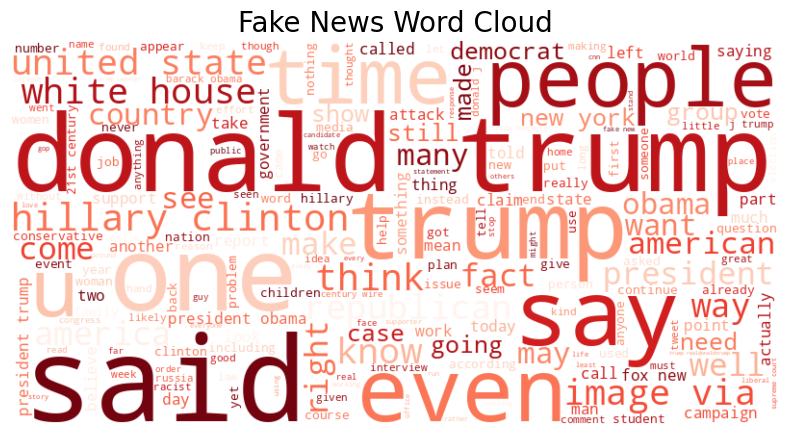

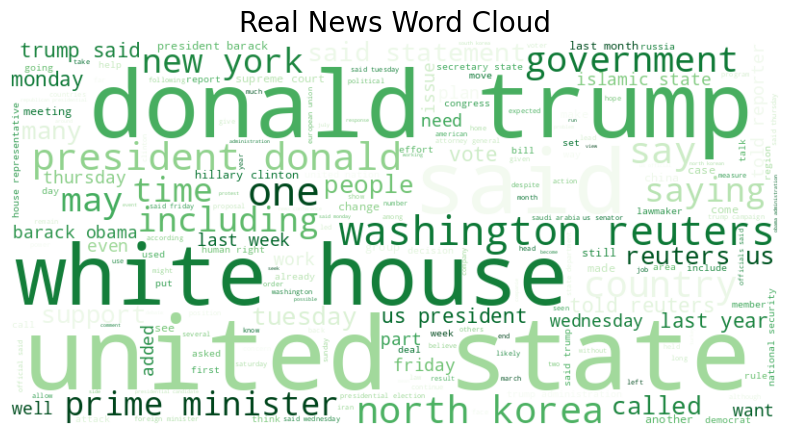

In [ ]:
from wordcloud import WordCloud

fake_words = ' '.join(news_df[news_df['label'] == 1]['text'])
real_words = ' '.join(news_df[news_df['label'] == 0]['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds')

plt.figure(figsize=(10, 5))
plt.title('Fake News Word Cloud', fontsize=20)
plt.imshow(wordcloud.generate(fake_words), interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens')
plt.figure(figsize=(10, 5))
plt.title('Real News Word Cloud', fontsize=20)
plt.imshow(wordcloud.generate(real_words), interpolation='bilinear')
plt.axis('off')
plt.show()

Identify and print top 10 words for each class (fake/real).

In [ ]:
feat_names = tfidf.get_feature_names_out()

models = {
    'Logistic Regression': lr_model.coef_[0],
    'SVM': svm_model.coef_[0]
}

features = {}
for name, coef in models.items():
  features[name] = pd.DataFrame({'Features' : feat_names, 'Coefficient' : coef})

for name,df in features.items():
  top_fake = df.sort_values(by='Coefficient', ascending=False).head(10)
  top_real = df.sort_values(by='Coefficient', ascending=True).head(10)

  print(f"\nTop 10 Words for Fake News ({name}):")
  print(top_fake)

  print(f"\nTop 10 Words for Real News ({name}):")
  print(top_real)



Top 10 Words for Fake News (Logistic Regression):
      Features  Coefficient
9586       via     8.784981
4505     image     5.469680
4010       gop     5.159781
4307   hillary     4.568017
5928        mr     4.556217
3306      even     4.467256
6184     obama     3.994825
5323      like     3.867655
591    america     3.820859
592   american     3.637958

Top 10 Words for Real News (Logistic Regression):
        Features  Coefficient
7677     reuters   -27.044030
7880        said   -18.695829
9729  washington    -6.141090
9772   wednesday    -5.662438
9506          us    -5.223940
9306     tuesday    -5.209191
9088    thursday    -5.054143
3833      friday    -4.772622
7559  republican    -4.350633
5858      monday    -4.233570

Top 10 Words for Fake News (SVM):
     Features  Coefficient
9586      via     6.045053
4505    image     3.242254
4010      gop     3.126308
7523      rep     2.500550
8074      sen     2.318616
7881  saidthe     2.222777
4507   images     2.216690
683      

Try n-grams (bigrams/trigrams) and check performance change.

In [ ]:
ngram_ranges = [(1, 1), (1, 2), (1, 3)]

X_train_text, X_test_text, y_train, y_test = train_test_split(news_df['text'], news_df['label'], test_size=0.2, random_state=42, stratify=news_df['label'])

for ngram in ngram_ranges:
    print(f'\n----- N-gram Range : {ngram} -----')

    tfidf = TfidfVectorizer(ngram_range=ngram, max_features=10000, stop_words='english')

    X_train_tfidf = tfidf.fit_transform(X_train_text)
    X_test_tfidf = tfidf.transform(X_test_text)

    log_model = LogisticRegression(max_iter=1000)
    log_model.fit(X_train_tfidf, y_train)
    log_pred = log_model.predict(X_test_tfidf)

    log_acc = accuracy_score(y_test, log_pred)
    log_f1 = f1_score(y_test, log_pred, average='weighted')
    print(f'Logistic Regression:\nAccuracy: {(log_acc*100):.2f}%\nF1-Score: {(log_f1*100):.2f}%')

    # SVM
    svm_model = LinearSVC(max_iter=1000)
    svm_model.fit(X_train_tfidf, y_train)
    svm_pred = svm_model.predict(X_test_tfidf)

    svm_acc = accuracy_score(y_test, svm_pred)
    svm_f1 = f1_score(y_test, svm_pred, average='weighted')
    print(f'SVM:\nAccuracy: {(svm_acc*100):.2f}%\nF1-Score: {(svm_f1*100):.2f}%')



----- N-gram Range : (1, 1) -----
Logistic Regression:
Accuracy: 98.64%
F1-Score: 98.64%
SVM:
Accuracy: 99.38%
F1-Score: 99.38%

----- N-gram Range : (1, 2) -----
Logistic Regression:
Accuracy: 98.88%
F1-Score: 98.88%
SVM:
Accuracy: 99.48%
F1-Score: 99.48%

----- N-gram Range : (1, 3) -----
Logistic Regression:
Accuracy: 98.98%
F1-Score: 98.98%
SVM:
Accuracy: 99.45%
F1-Score: 99.45%


Compare Logistic Regression vs. Random Forest vs. XGBoost.

Random Forest
Accuracy : 99.65 %
F1-Score : 99.65 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



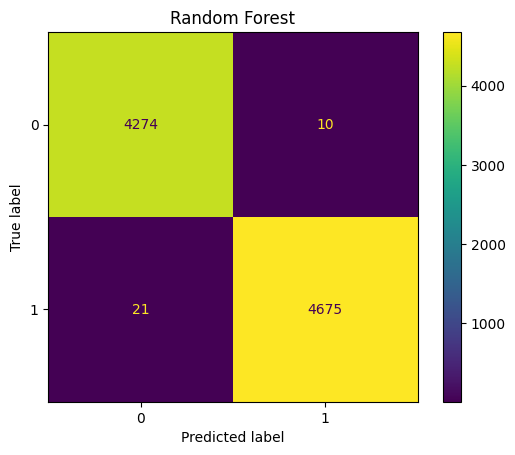

XGBoost
Accuracy : 99.73 %
F1-Score : 99.73 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



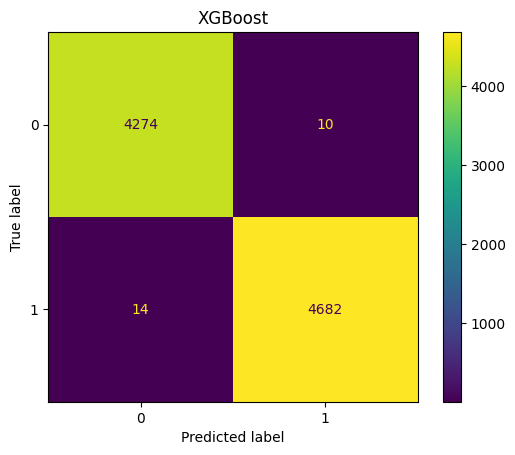

['xgb_model.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
}

for name, m in models.items():
    pred = m.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='weighted')

    print(f"{name}")
    print(f"Accuracy : {(accuracy * 100):.2f} %")
    print(f"F1-Score : {(f1 * 100):.2f} %")
    print("\nClassification Report:\n", classification_report(y_test, pred))

    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(name)
    plt.show()

joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')


Try SMOTE to balance data if classes are skewed.  --> not using smote as i got higher F1-Scores indicating model already performs well

Merge title + content fields and test performance gain.

In [ ]:
news_df['combined'] = news_df['title'] + ' ' + news_df['text']
news_df

,title,text,subject,date,label,source,combined
0,breaking gop chairman grassley enough demands ...,donald trump white house chaos trying cover ru...,News,2017-07-21,1,fake,breaking gop chairman grassley enough demands ...
1,failed gop candidates remembered hilarious moc...,donald trump presumptive gop nominee time reme...,News,2016-05-07,1,fake,failed gop candidates remembered hilarious moc...
2,mike pence ’ new dc neighbors hilariously trol...,mike pence huge homophobe supports exgay conve...,News,2016-12-03,1,fake,mike pence ’ new dc neighbors hilariously trol...
3,california ag pledges defend birth control ins...,san francisco reuters california attorney gene...,politicsNews,2017-10-06,0,real,california ag pledges defend birth control ins...
4,az ranchers living usmexico border destroy nan...,twisted reasoning comes pelosi days especially...,politics,2017-04-25,1,fake,az ranchers living usmexico border destroy nan...
...,...,...,...,...,...,...,...
44893,nigeria says us agrees delayed 593 million fig...,abuja reuters united states formally agreed se...,worldnews,2017-12-27,0,real,nigeria says us agrees delayed 593 million fig...
44894,boiler room 62 – fatal illusions,tune alternate current radio network acr anoth...,Middle-east,2016-06-29,1,fake,boiler room 62 – fatal illusions tune alternat...
44895,atheists sue governor texas display capitol gr...,convinced freedom religion group atheists get ...,Government News,2016-02-27,1,fake,atheists sue governor texas display capitol gr...
44896,republican tax plan would deal financial hit u...,washington reuters republican tax plan unveile...,politicsNews,2017-11-02,0,real,republican tax plan would deal financial hit u...


Logistic Regression
Accuracy : 98.69%
F1-Score: 98.69%


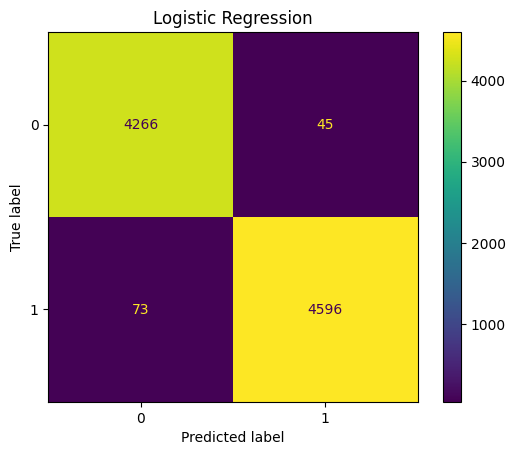

SVM
Accuracy : 99.49%
F1-Score: 99.49%


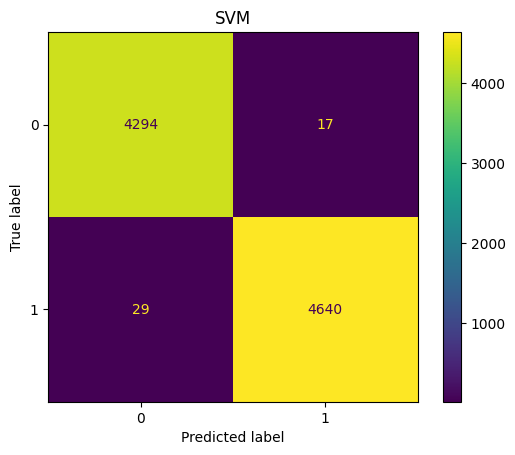

Random Forest
Accuracy : 99.61%
F1-Score: 99.61%


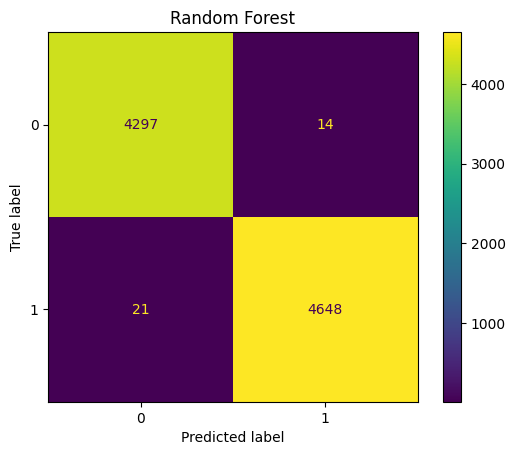

XGBoost
Accuracy : 99.70%
F1-Score: 99.70%


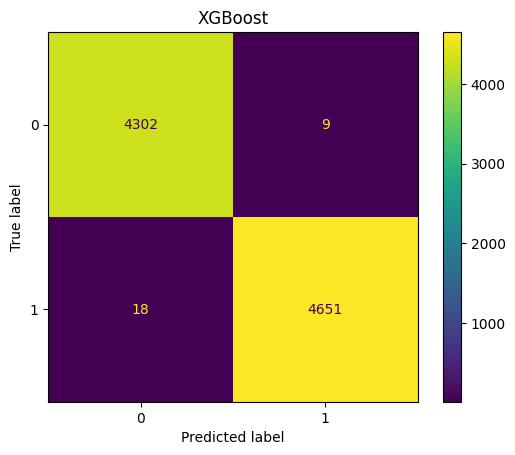

['xgb_model_combined.pkl']

In [ ]:
tfidf_com = TfidfVectorizer(max_features=10000)
x_tfidf_com = tfidf_com.fit_transform(news_df['combined'])
x_train, x_test, y_train, y_test = train_test_split(x_tfidf_com, news_df['label'], test_size=0.2, random_state=42)

lrcom = LogisticRegression(max_iter=1000)
lrcom.fit(x_train, y_train)

svmcom = LinearSVC(max_iter=1000)
svmcom.fit(x_train, y_train)

randcom = RandomForestClassifier(n_estimators=100)
randcom.fit(x_train, y_train)

xgbcom = XGBClassifier(eval_metric='logloss')
xgbcom.fit(x_train, y_train)

models = {
    'Logistic Regression' : lrcom,
    'SVM' : svmcom,
    'Random Forest' : randcom,
    'XGBoost' : xgbcom
}

for name,m in models.items():
    prediction = m.predict(x_test)
    f1 = f1_score(y_test, prediction, average='weighted')
    acc = accuracy_score(y_test, prediction)
    print(f'{name}\nAccuracy : {(acc*100):.2f}%\nF1-Score: {(f1*100):.2f}%')
    cm = confusion_matrix(y_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(name)
    plt.show()

joblib.dump(tfidf_com, 'tfidf_combined.pkl')
joblib.dump(lrcom, 'lr_model_combined.pkl')
joblib.dump(svmcom, 'svm_model_combined.pkl')
joblib.dump(randcom, 'rf_model_combined.pkl')
joblib.dump(xgbcom, 'xgb_model_combined.pkl')


Fine-tune hyperparameters for best model using GridSearchCV.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

x = news_df['combined']
y = news_df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

results = []

models = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000),
        {
            'clf__C': [0.1, 1, 10]
        }
    ),
    'SVM': (
        LinearSVC(),
        {
            'clf__C': [0.1, 1, 10]
        }
    ),
    'Random Forest': (
        RandomForestClassifier(),
        {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [None, 10, 20]
        }
    ),
    'XGBoost': (
        XGBClassifier(eval_metric='logloss', random_state=42),
        {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [3, 5],
            'clf__learning_rate': [0.1, 0.05]
        }
    )
  }
for name,(model,param) in models.items():
    print(f"\nTraining {name}...")
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000)),
        ('clf', model)
    ])
    gs = GridSearchCV(pipe, param_grid=param, scoring='f1_weighted', cv=5, verbose=1)
    gs.fit(x_train, y_train)

    best_model = gs.best_estimator_
    y_pred = best_model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Best Parameters for {name}: {gs.best_params_}")
    print(f"Accuracy: {acc*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}%")
    print(classification_report(y_test, y_pred))
    results.append((name, gs.best_params_, acc, f1))

    # cm = confusion_matrix(y_test, y_pred)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot(cmap='Blues')
    # plt.title(f"{name} - Confusion Matrix")
    # plt.show()

joblib.dump(best_model, f'{name.lower().replace(" ", "_")}_best_model.pkl')


Training Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters for Logistic Regression: {'clf__C': 10}
Accuracy: 99.25%
F1 Score: 99.25%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4311
           1       0.99      0.99      0.99      4669

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Training SVM...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters for SVM: {'clf__C': 1}
Accuracy: 99.48%
F1 Score: 99.48%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4311
           1       1.00      0.99      0.99      4669

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Training Ran

['xgboost_best_model.pkl']

Saved model on my drive for access


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

xgb_model_job = joblib.load('xgboost_best_model.pkl')
joblib.dump(xgb_model_job, '/content/drive/MyDrive/xgboost_best_model.pkl')

Mounted at /content/drive


['/content/drive/MyDrive/xgboost_best_model.pkl']

Build a sarcasm keyword list and test rule-based tagging.

In [ ]:
sarcasm_keywords = [
    "yeah right", "as if", "totally", "sure", "obviously", "great", "awesome",
    "just what I needed", "oh joy", "perfect", "fantastic", "love that", "how nice",
    "because that makes sense", "amazing", "nice job", "brilliant", "good for you"
]
def is_sarcastic(text):
    text = text.lower()
    for keyword in sarcasm_keywords:
        if keyword in text:
            return 1
    return 0

new_df = pd.DataFrame()
new_df['combined'] = news_df['combined']
new_df['sarcastic_combined'] = new_df['combined'].apply(is_sarcastic)

new_df['text'] = news_df['text']
new_df['sarcastic_text'] = new_df['text'].apply(is_sarcastic)
new_df



,combined,sarcastic_combined,text,sarcastic_text
0,breaking gop chairman grassley enough demands ...,0,donald trump white house chaos trying cover ru...,0
1,failed gop candidates remembered hilarious moc...,1,donald trump presumptive gop nominee time reme...,1
2,mike pence ’ new dc neighbors hilariously trol...,1,mike pence huge homophobe supports exgay conve...,1
3,california ag pledges defend birth control ins...,1,san francisco reuters california attorney gene...,1
4,az ranchers living usmexico border destroy nan...,0,twisted reasoning comes pelosi days especially...,0
...,...,...,...,...
44893,nigeria says us agrees delayed 593 million fig...,0,abuja reuters united states formally agreed se...,0
44894,boiler room 62 – fatal illusions tune alternat...,0,tune alternate current radio network acr anoth...,0
44895,atheists sue governor texas display capitol gr...,0,convinced freedom religion group atheists get ...,0
44896,republican tax plan would deal financial hit u...,0,washington reuters republican tax plan unveile...,0


Test your model on an unseen real-world article.

In [ ]:
tfidf_vectorizer = joblib.load('tfidf_combined.pkl')
model = joblib.load('xgboost_best_model.pkl')

article = '''
The White House is beginning to panic. At least that s the most logical conclusion from their latest jaw-dropping move. In an order that s pretty much unprecedented (wouldn t it be nice if we had just one day without something unprecedented coming from this White House?), the Trump White House has told various government departments that they are not to cooperate with Democrats period.Reportedly, this has been happening since Trump took office. They have formulated a policy that says that agencies are only allowed to respond to committee chairs. Republicans hold both houses of Congress, so every committee is chaired by a Republican.The declaration amounts to a new level of partisanship in Washington, where the president and his administration already feels besieged by media reports and attacks from Democrats. The idea, Republicans said, is to choke off the Democratic congressional minorities from gaining new information that could be used to attack the president. You have Republicans leading the House, the Senate and the White House,  a White House official said.  I don t think you d have the Democrats responding to every minority member request if they were in the same position. A White House spokeswoman said the policy of the administration is  to accommodate the requests of chairmen, regardless of their political party.  There are no Democratic chairmen, as Congress is controlled by Republicans.Source: PoliticoThe information blackout, at least according to White House officials, isn t toward every request from Democrats, just the requests from oversight committees. Whew, that should make us all feel so much better. It s only the agencies that are tagged with making sure laws are followed that are being hobbled.While Obama s White House didn t answer every request from Republicans (admittedly, many are meant to back the opposition into a corner), there was never an explicit policy.Now, of course, while the agencies are under the executive umbrella, they work for the office of the presidency, not for the president personally. For Trump, though, that seems to be far too nuanced a distinction. While agencies are legally free (and some would argue ethically obligated) to abide by oversight requests, even from the minority party, Trump has proven that he will fire anyone who steps out of line.This could certainly backfire, though. If Trump is still in office by the time midterms roll around, and if he keeps destroying the Republican Party, we could see a Democratic takeover of at least one house of Congress. That would give Democrats committee chairs. While the White House could still ignore Democrats  requests, there would be no way around the word  obstruction. Featured image via Pool/Getty Images
'''

prediction = model.predict([article])

if prediction[0] == 0:
    print('Real')
else:
    print('Fake')


Fake


Create a simple Streamlit app to input news and show prediction (On VSCode)